# **Preparación de datos previa a proceso de modelado**

## **Librerías**

In [2]:
from modeling_auxiliary_functions import (apply_pca,
                                          train_model, 
                                          split_train_test_date,
                                          prep_results_df,
                                          plot_feature_importance,
                                          check_gaussian_residuals
                                 )
from modeling_auxiliary_functions import add_total_load

import warnings
import pandas as pd
import datetime as dt


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

## **Proceso de entrenamiento y generación de predicciones**
El proceso de entrenamiento y generación de predicciones fue desarrollado de manera tal que puede ser reutilizado de manera invariante para cualquiera de los escenarios a modelar. Este realiza los siguientes fases:

**Fase 1:** Parametrización individual

**Fase 2:** Separación de datos para entrenamiento y predicción

**Fase 3:** Reducción de dimensionalidad con PCA

**Fase 4:** Entrenamiento de múltiples modelos de ML

**Fase 5:** Generación de predicciones

**Fase 6:** Evaluación de residuos e importancia de variables
<br><br><br>
A continución procede a realizarse para los 3 escenarios a modelar.

---
### **Oferta de mercado diario:** 
**Instante de predicción:** 12:00 del día R.

**Horas de predicción:** De 0:00 a 24:00 del día S.

In [27]:
### ========= FASE 1 =========
basic_dataset_file = './modeling_datasets/basic_dataset.pkl'
target_column = "total_load_actual"
prediction_start_date = dt.datetime(2018,1,1,0)
reduction_min_variance = 0.90
offer_type = "daily_market"

In [28]:
### ========= FASE 2 =========
predictor_dataset_file = f'./modeling_datasets/{offer_type}_dataset.pkl'
basic_dataset = pd.read_pickle(basic_dataset_file)
predictor_dataset = pd.read_pickle(predictor_dataset_file)
offer_dataset = add_total_load(predictor_dataset, basic_dataset)
X_train, y_train, X_test, y_test = split_train_test_date(offer_dataset, target_column, prediction_start_date)

In [29]:
### ========= FASE 3 =========
pca_summary, num_components, X_train, X_test = apply_pca(reduction_min_variance, X_train, X_test)
pca_summary

,components,accumulated_variance
0,1,0.342178
1,2,0.619192
2,3,0.818391
3,4,0.883832
4,5,0.910033
...,...,...
141,142,1.000000
142,143,1.000000
143,144,1.000000
144,145,1.000000


In [ ]:
### ========= FASE 4 =========
models_dic = {}
models_dic["RFO"] = train_model(X_train, y_train, "RFO")
models_dic["XGB"] = train_model(X_train, y_train, "XGB")
models_dic["KNN"] = train_model(X_train, y_train, "KNN")
models_dic["MLP"] = train_model(X_train, y_train, "MLP")

In [31]:
### ========= FASE 5 =========
results_daily_market = prep_results_df(X_test, y_test, models_dic, offer_type)

================= ANÁLISIS DE RESIDUOS =================
Los residuos no forman una distribución Gaussiana.
La distribución es leptocúrtica (K=1.16)


================= ANÁLISIS DE IMPORTANCIA DE VARIABLES =================


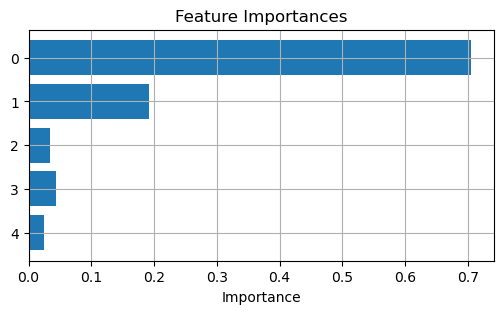

In [32]:
### ========= FASE 6 =========
check_gaussian_residuals(results_daily_market, "XGB")
plot_feature_importance(X_train, models_dic["XGB"])

---
### **Oferta de tercera sesión intradiaria:** 
**Instante de predicción:** 21:50 del día R.

**Horas de predicción:** De 00:00 a 24:00 del día S.

In [33]:
### ========= FASE 1 =========
basic_dataset_file = './modeling_datasets/basic_dataset.pkl'
target_column = "total_load_actual"
prediction_start_date = dt.datetime(2018,1,1,0)
reduction_min_variance = 0.90
offer_type = "third_session"

In [34]:
### ========= FASE 2 =========
predictor_dataset_file = f'./modeling_datasets/{offer_type}_dataset.pkl'
basic_dataset = pd.read_pickle(basic_dataset_file)
predictor_dataset = pd.read_pickle(predictor_dataset_file)
offer_dataset = add_total_load(predictor_dataset, basic_dataset)
X_train, y_train, X_test, y_test = split_train_test_date(offer_dataset, target_column, prediction_start_date)

In [35]:
### ========= FASE 3 =========
pca_summary, num_components, X_train, X_test = apply_pca(reduction_min_variance, X_train, X_test)
pca_summary

,components,accumulated_variance
0,1,0.400292
1,2,0.632791
2,3,0.812259
3,4,0.885763
4,5,0.914754
...,...,...
141,142,1.000000
142,143,1.000000
143,144,1.000000
144,145,1.000000


In [ ]:
### ========= FASE 4 =========
models_dic = {}
models_dic["RFO"] = train_model(X_train, y_train, "RFO")
models_dic["XGB"] = train_model(X_train, y_train, "XGB")
models_dic["KNN"] = train_model(X_train, y_train, "KNN")
models_dic["MLP"] = train_model(X_train, y_train, "MLP")

In [37]:
### ========= FASE 5 =========
results_third_offer = prep_results_df(X_test, y_test, models_dic, offer_type)

In [6]:
### ========= FASE 6 =========
check_gaussian_residuals(results_third_offer, "XGB")
plot_feature_importance(X_train, models_dic["XGB"])

NameError: name 'results_third_offer' is not defined

---
### **Oferta de sexta sesión intradiaria:** 
**Instante de predicción:** 09:50 del día S.

**Horas de predicción:** De 13:00 a 24:00 del día S.

In [39]:
### ========= FASE 1 =========
basic_dataset_file = './modeling_datasets/basic_dataset.pkl'
target_column = "total_load_actual"
prediction_start_date = dt.datetime(2018,1,1,0)
reduction_min_variance = 0.90
offer_type = "sixth_session"

In [40]:
### ========= FASE 2 =========
predictor_dataset_file = f'./modeling_datasets/{offer_type}_dataset.pkl'
basic_dataset = pd.read_pickle(basic_dataset_file)
predictor_dataset = pd.read_pickle(predictor_dataset_file)
offer_dataset = add_total_load(predictor_dataset, basic_dataset)
X_train, y_train, X_test, y_test = split_train_test_date(offer_dataset, target_column, prediction_start_date)

In [41]:
### ========= FASE 3 =========
pca_summary, num_components, X_train, X_test = apply_pca(reduction_min_variance, X_train, X_test)
pca_summary

,components,accumulated_variance
0,1,0.389763
1,2,0.652244
2,3,0.743423
3,4,0.828488
4,5,0.863710
...,...,...
141,142,1.000000
142,143,1.000000
143,144,1.000000
144,145,1.000000


In [ ]:
### ========= FASE 4 =========
models_dic = {}
models_dic["RFO"] = train_model(X_train, y_train, "RFO")
models_dic["XGB"] = train_model(X_train, y_train, "XGB")
models_dic["KNN"] = train_model(X_train, y_train, "KNN")
models_dic["MLP"] = train_model(X_train, y_train, "MLP")

In [43]:
### ========= FASE 5 =========
results_sixth_offer = prep_results_df(X_test, y_test, models_dic, offer_type)

================= ANÁLISIS DE RESIDUOS =================
Los residuos no forman una distribución Gaussiana.
La distribución es leptocúrtica (K=1.16)


================= ANÁLISIS DE IMPORTANCIA DE VARIABLES =================


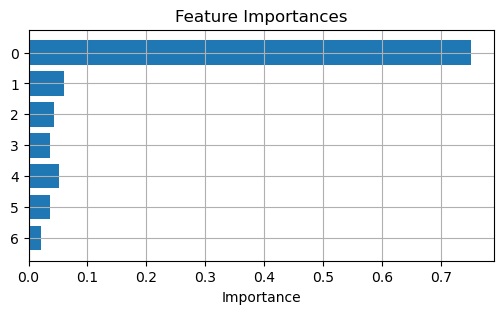

In [44]:
### ========= FASE 6 =========
check_gaussian_residuals(results_sixth_offer, "XGB")
plot_feature_importance(X_train, models_dic["XGB"])

---
### Exportación de resultados para análisis

In [45]:
complete_results_df = pd.concat([
    results_daily_market,
    results_third_offer,
    results_sixth_offer
])
complete_results_df

,time,total_load_actual,prediction,model,offer_type
26232,2018-01-01 00:00:00,22779.0,24061.0,RFO,daily_market
26233,2018-01-01 01:00:00,22009.0,22594.0,RFO,daily_market
26234,2018-01-01 02:00:00,20589.0,21181.0,RFO,daily_market
26235,2018-01-01 03:00:00,19547.0,21181.0,RFO,daily_market
26236,2018-01-01 04:00:00,18871.0,21147.0,RFO,daily_market
...,...,...,...,...,...
16021,2018-12-30 19:00:00,29221.0,21697.0,MLP,sixth_session
16022,2018-12-30 20:00:00,30042.0,23869.0,MLP,sixth_session
16023,2018-12-30 21:00:00,30229.0,24788.0,MLP,sixth_session
16024,2018-12-30 22:00:00,29145.0,22673.0,MLP,sixth_session


In [46]:
complete_results_df.to_csv("results/results.csv", index=False)